# Installation

In [1]:
# !conda install pandas -y
# !conda install -c conda-forge matplotlib -y
# !conda install seaborn -y
# !conda install scipy -y
# !conda install anaconda::openpyxl -y

# Importing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import shapiro

# Preprocessing

In [3]:
df = pd.read_excel('dataset.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 45 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   no.        60 non-null     int64 
 1   format     60 non-null     object
 2   md         60 non-null     int64 
 3   pd         60 non-null     int64 
 4   td         60 non-null     int64 
 5   pf         60 non-null     int64 
 6   ef         60 non-null     int64 
 7   fr         60 non-null     int64 
 8   aqr1a      60 non-null     object
 9   arq1b      19 non-null     object
 10  aqr2a      60 non-null     object
 11  aqr2b      9 non-null      object
 12  aqr3a      60 non-null     object
 13  aqr3b      16 non-null     object
 14  aqr4a      60 non-null     object
 15  aqr4b      14 non-null     object
 16  aqr5a      60 non-null     object
 17  aqr5b      10 non-null     object
 18  aqr6a      60 non-null     object
 19  aqr6b      7 non-null      object
 20  aqr7a      60 non-null     object


In [4]:
df.describe()

,no.,md,pd,td,pf,ef,fr,recall,interpret,compre,lb,duration
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,30.500000,61.083333,23.166667,45.833333,76.333333,61.000000,32.250000,4.100000,3.150000,7.250000,10.283333,616.733333
std,17.464249,21.883584,22.567538,25.564254,19.869632,22.451454,26.608031,0.817188,1.204863,1.693707,10.473682,249.814498
min,1.000000,0.000000,0.000000,0.000000,20.000000,15.000000,0.000000,2.000000,0.000000,3.000000,0.000000,224.000000
25%,15.750000,45.000000,5.000000,25.000000,65.000000,48.750000,10.000000,4.000000,2.000000,6.000000,2.000000,412.500000
50%,30.500000,67.500000,15.000000,50.000000,80.000000,65.000000,25.000000,4.000000,3.000000,7.500000,7.000000,584.500000
75%,45.250000,76.250000,30.000000,65.000000,90.000000,75.000000,50.000000,5.000000,4.000000,8.250000,14.250000,786.000000
max,60.000000,100.000000,80.000000,95.000000,100.000000,100.000000,100.000000,5.000000,5.000000,10.000000,41.000000,1161.000000


In [5]:
mapping = {
    'Strongly Disagree': -2,
    'Disagree': -1,
    'Depends': 0,
    'Agree': 1,
    'Strongly Agree': 2
}

r_mapping = {
    'Strongly Disagree': 2,
    'Disagree': 1,
    'Depends': 0,
    'Agree': -1,
    'Strongly Agree': -2
}

reverse_qs = [2,6,8,11,12,14]

arq_quanti_labels = [f"aqr{i+1}a" for i in range(14)]
for i, label in enumerate(arq_quanti_labels):
    if (i + 1) in reverse_qs:
        print(i + 1, "reversed")
    df[label] = df[label].map(r_mapping if (i + 1) in reverse_qs else mapping)

2 reversed
6 reversed
8 reversed
11 reversed
12 reversed
14 reversed


In [8]:
print_readers = df[df['format'] == 'Print'].reset_index().iloc[:,1:]
screen_readers = df[df['format'] == 'Screen'].reset_index().iloc[:,1:]

quanti_labels = ['no.', 'md', 'pd', 'td', 'pf', 'ef', 'fr'] + arq_quanti_labels + ['recall', 'interpret', 'compre', 'lb', 'duration']
print_readers_quanti = print_readers[quanti_labels]
screen_readers_quanti = screen_readers[quanti_labels]

In [9]:
print(print_readers_quanti.isna().any().any())
print(screen_readers_quanti.isna().any().any())

False
False


# Statistical Tests

## Normality Test

In [10]:
stats, pvals = shapiro(print_readers_quanti.iloc[:,1:], axis=0)
print_normality = pd.DataFrame({"column":list(print_readers_quanti.columns)[1:], "shapiro": pvals})

stats, pvals = shapiro(screen_readers_quanti.iloc[:,1:], axis=0)
screen_normality = pd.DataFrame({"column":list(screen_readers_quanti.columns)[1:], "shapiro": pvals})

normality = pd.merge(print_normality, screen_normality, on='column')
normality.columns = ['columns', 'print_shapiro', 'screen_shapiro']

normality["print_normal"] = normality['print_shapiro'].apply(lambda x: "normal" if x > 0.05 else "NOT normal")
normality["screen_normal"] = normality['screen_shapiro'].apply(lambda x: "normal" if x > 0.05 else "NOT normal")

normality

,columns,print_shapiro,screen_shapiro,print_normal,screen_normal
0,md,0.057488,0.092494,normal,normal
1,pd,0.001376,0.000502,NOT normal,NOT normal
2,td,0.717629,0.165485,normal,normal
3,pf,0.003058,0.042071,NOT normal,NOT normal
4,ef,0.468324,0.026312,normal,NOT normal
5,fr,0.001996,0.054298,NOT normal,normal
6,aqr1a,0.003590,0.002706,NOT normal,NOT normal
7,aqr2a,0.000458,0.000009,NOT normal,NOT normal
8,aqr3a,0.009893,0.002701,NOT normal,NOT normal
9,aqr4a,0.011022,0.005458,NOT normal,NOT normal


## NASA-TLX Distribution

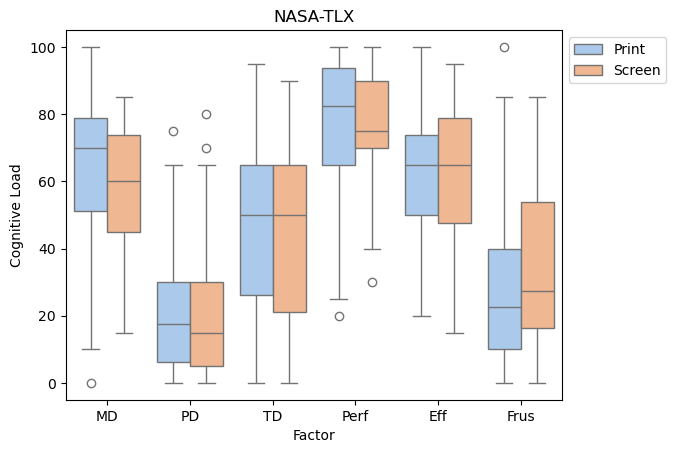

In [11]:
nasa_tlx_long = df.melt(id_vars=['format'], value_vars=['md', 'pd', 'td', 'pf', 'ef', 'fr'], 
                  var_name='factor', value_name='load')

sns.boxplot(x='factor', y='load', hue='format', data=nasa_tlx_long, palette='pastel')

# PLOTS INDIVIDUAL POINTS
# sns.stripplot(
#     x='factor', 
#     y='load', 
#     hue='format', 
#     data=nasa_tlx_long,
#     dodge=True, 
#     alpha=0.4,
#     palette='dark:black'  # replaces color='black'
# )

plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left')

plt.title('NASA-TLX')
plt.ylabel('Cognitive Load')
plt.xlabel('Factor')
plt.xticks(
    ticks=range(6),          # positions of the ticks
    labels=['MD', 'PD', 'TD', 'Perf', 'Eff', 'Frus']
)
plt.show()

In [27]:
df

,no.,format,md,pd,td,pf,ef,fr,aqr1a,arq1b,...,aqr14b,qual1,qual2,qual3,recall,interpret,compre,lb,duration,ctrlf
0,1,Print,75,40,75,85,85,45,-1,NaN,...,NaN,I take less time when reading electronically,good lighting and a comfortable table and chair,Have a mouse/apple pencil to make it easier to...,4,3,7,1,513,Not Applicable
1,2,Screen,50,5,35,100,15,40,2,NaN,...,NaN,"Generally speaking, I generally like reading w...","Reading in a nice quiet area, with adequate li...",Use a dedicated reading app that allows you to...,5,3,8,14,763,No
2,3,Print,50,10,30,90,30,10,0,My memory of readings is not based on the medi...,...,NaN,My preference of electronic over printed is mo...,Its always better to be sitting up right on a ...,Not much that is not already in place i.e. zoo...,4,2,6,3,676,Not Applicable
3,4,Print,75,60,25,80,65,30,0,"Depending on the task, for shorter papers or p...",...,"Like I mentioned before, I would prefer both, ...","I hate reading, but for the times that I need ...","Depending on the paper, but usually diagrams a...",I prefer to have NotebookLLM or ChatGPT by the...,4,2,6,1,307,Not Applicable
4,5,Print,95,25,0,100,50,0,0,(Strongly Agree) I usually remember informatio...,...,NaN,I don't like reading academic papers I just re...,if i have a very delicious meal like steak and...,some way to automatically stop all of my effor...,4,3,7,1,320,Not Applicable
5,6,Screen,80,15,15,95,15,70,0,If the formatting of the course reading was cr...,...,NaN,I find well formatted and clear electronic mat...,I prefer to have the pages ordered correctly a...,I like to have a larger screen size as my eyes...,4,5,9,1,282,Yes
6,7,Screen,45,5,50,70,55,50,0,"Most of the time, I don't have printed reading...",...,"if i have the option, such as when prof gives ...","For me, I try to read on my tablet to replicat...","I usually, off my devices or DND, also I try t...",none comes to mind,5,4,9,11,592,Yes
7,8,Screen,80,55,55,40,40,20,2,NaN,...,I will still consider reading my course materi...,"Whenever I have to study for my majors, I make...",It's really important that when you read on pa...,My biggest factor when reading on laptop is th...,3,3,6,10,873,No
8,9,Print,0,50,40,100,75,15,2,NaN,...,NaN,Heading bullets on the left side of the pdf. T...,Bold face text for important terminnologies. F...,Focus mode changing the font style and the bac...,3,2,5,0,325,Not Applicable
9,10,Print,55,5,70,100,60,25,1,NaN,...,NaN,"If we are factoring in the convenience factor,...",Having writing materials and a place to take n...,"To read well on a laptop, turn on do not distu...",4,5,9,2,343,Not Applicable


In [26]:
nasa_tlx_long

,format,factor,load
0,Print,md,75
1,Screen,md,50
2,Print,md,50
3,Print,md,75
4,Print,md,95
...,...,...,...
355,Screen,fr,25
356,Print,fr,35
357,Screen,fr,50
358,Print,fr,100


## ARQ Distribution

In [25]:
df[['format'] + arq_quanti_labels]

,format,aqr1a,aqr2a,aqr3a,aqr4a,aqr5a,aqr6a,aqr7a,aqr8a,aqr9a,aqr10a,aqr11a,aqr12a,aqr13a,aqr14a
0,Print,-1,-2,-1,-2,-2,-2,-2,-2,-1,-2,-2,-2,-1,-1
1,Screen,2,-1,-1,0,-1,-1,2,-1,2,0,1,-1,2,1
2,Print,0,-1,-1,-1,-1,1,-2,-1,-1,-1,-1,2,2,-1
3,Print,0,1,0,0,0,-2,-1,0,1,-2,-2,-2,1,0
4,Print,0,-2,2,2,0,-2,-2,-2,2,2,2,2,2,2
5,Screen,0,-2,-2,-2,-2,1,-2,-2,-2,-2,-2,-1,-2,-2
6,Screen,0,-2,-2,-1,-2,1,2,1,1,0,1,-1,1,0
7,Screen,2,-1,0,1,2,2,2,-1,2,2,1,-1,2,0
8,Print,2,-2,0,-2,-2,-2,2,-2,1,-2,-2,-2,-2,-2
9,Print,1,-2,-1,1,-2,1,2,-2,-1,1,1,-2,1,1
